In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix



from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier




In [2]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

In [3]:
#pip install opencv-python

In [4]:
pip -V

pip 23.2.1 from C:\Users\mayas\anaconda3\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


# Downloading the data and inspecting it

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784', version=1)
#mnist.keys()
# dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url']

# EDA

In [7]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
# Taking less data to speed up training. 
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]

X_test = X[6000:7000]
y_test = y[6000:7000]

# Standardizing the data (as you generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

In [9]:
print(X_train.shape)
 
print( y_train.shape)
 

(5000, 784)
(5000,)


In [10]:
# The first label ("true answer") is 5. 
y[0]

5

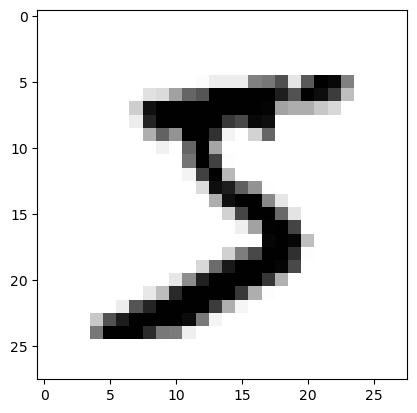

In [11]:
# Plotting the features of the X data, it looks like a 5.
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis("off")

In [12]:
 y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
 y_test_5 = (y_test == 5)

In [13]:
print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


In [14]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_clas

C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_clas

C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mayas

C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_clas

C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mayas

Best Hyperparameters: {'clf__C': 0.1, 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'clf__tol': 0.0001}
Accuracy: 0.868


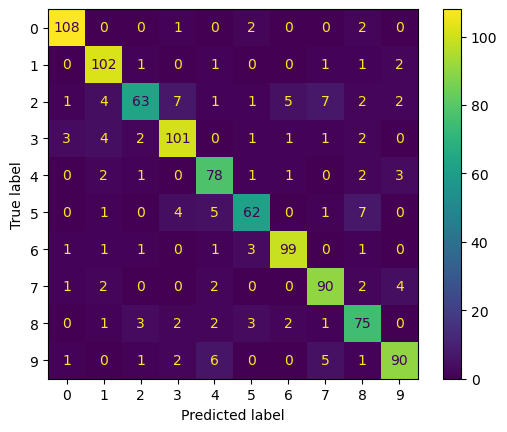

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Skapa en pipeline med StandardScaler och LinearSVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(random_state=42))
])

# Definiera hyperparametrar som ska testas
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__tol': [1e-3, 1e-4],
    'clf__max_iter': [1000, 2000]
}

# Skapa ett grid search-objekt
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Utför grid search på träningsdata
grid_search.fit(X_train, y_train)

# Visa de bästa hyperparametrarna
print("Best Hyperparameters:", grid_search.best_params_)

# Använd modellen med bästa hyperparametrarna för att göra förutsägelser på valideringsdata
y_val_pred = grid_search.predict(X_val)

# Beräkna noggrannheten av modellen
accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", accuracy)

# Visa förvirringsmatrisen för valideringsdata
display_confusion_matrix(y_val, y_val_pred)


In [25]:

import time

start_time = time.time()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")


Elapsed Time: 0.0 seconds


In [16]:
# # Load the MNIST data
# mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# # Extract features and labels
# X = mnist["data"]
# y = mnist["target"].astype(np.uint8)

# # Split the data into training, validation, and test sets
# X_train_val, X_test, y_train_val, y_test = train_test_split(
#     X, y, test_size=10000, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train_val, y_train_val, test_size=10000, random_state=42)


# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (5000, 784) (5000,)
Validation set shape: (1000, 784) (1000,)
Test set shape: (1000, 784) (1000,)


In [17]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC

# Instantiate the models
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)


In [18]:
# Train the Random Forest model on the training data
random_forest_clf.fit(X_train, y_train)

# Print out the score for the Random Forest model on the validation data
print("Random Forest score:", random_forest_clf.score(X_val, y_val))


Random Forest score: 0.939


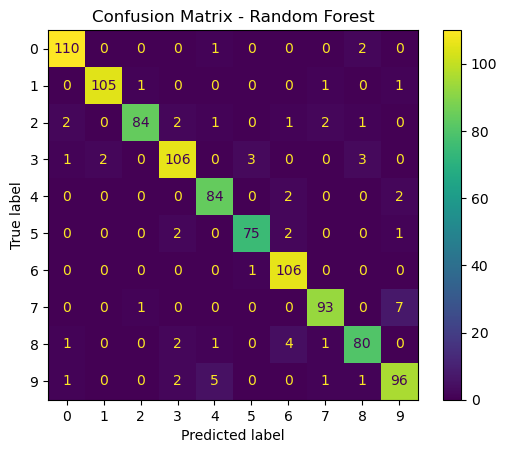

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions for Random Forest model
y_val_pred_rf = random_forest_clf.predict(X_val)

# Compute confusion matrix for Random Forest model
cm_rf = confusion_matrix(y_val, y_val_pred_rf)

# Display confusion matrix for Random Forest model
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest_clf.classes_)
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [20]:
# Train the Extra Trees model on the training data
extra_trees_clf.fit(X_train, y_train)

# Print out the score for the Extra Trees model on the validation data
print("Extra Trees score:", extra_trees_clf.score(X_val, y_val))


Extra Trees score: 0.947


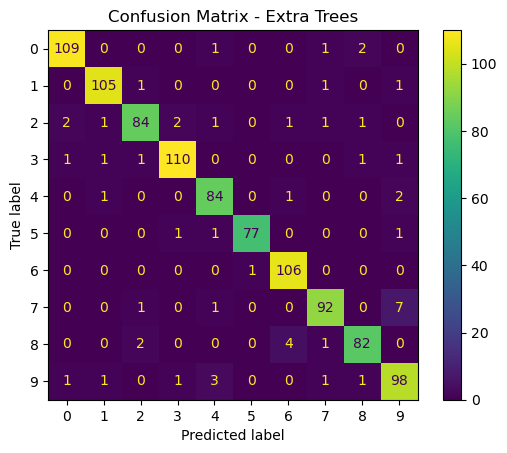

In [21]:
# Predictions for Extra Trees model
y_val_pred_et = extra_trees_clf.predict(X_val)

# Compute confusion matrix for Extra Trees model
cm_et = confusion_matrix(y_val, y_val_pred_et)

# Display confusion matrix for Extra Trees model
disp_et = ConfusionMatrixDisplay(confusion_matrix=cm_et, display_labels=extra_trees_clf.classes_)
disp_et.plot()
plt.title('Confusion Matrix - Extra Trees')
plt.show()


In [22]:
# Train the LinearSVC model on the training data
svm_clf.fit(X_train, y_train)

# Print out the score for the LinearSVC model on the validation data
print("LinearSVC score:", svm_clf.score(X_val, y_val))


LinearSVC score: 0.847


C:\Users\mayas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


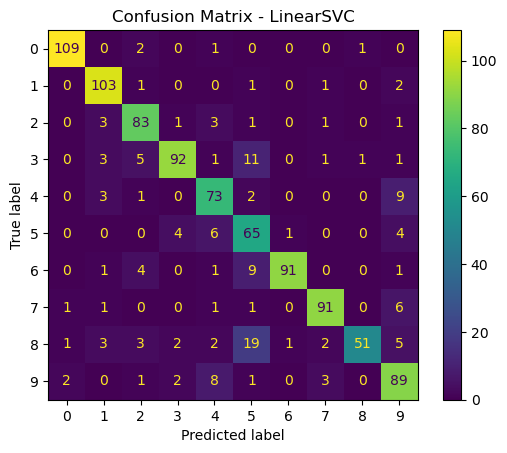

In [23]:
# Predictions for LinearSVC model
y_val_pred_svm = svm_clf.predict(X_val)

# Compute confusion matrix for LinearSVC model
cm_svm = confusion_matrix(y_val, y_val_pred_svm)

# Display confusion matrix for LinearSVC model
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_clf.classes_)
disp_svm.plot()
plt.title('Confusion Matrix - LinearSVC')
plt.show()


In [24]:
# Score for Random Forest model
score_rf = random_forest_clf.score(X_val, y_val)

# Score for Extra Trees model
score_et = extra_trees_clf.score(X_val, y_val)

# Score for LinearSVC model
score_svm = svm_clf.score(X_val, y_val)

# Find the best model score
best_score = max(score_rf, score_et, score_svm)

# Print the best model score
if best_score == score_rf:
    print("Random Forest model has the best score:", best_score)
elif best_score == score_et:
    print("Extra Trees model has the best score:", best_score)
else:
    print("LinearSVC model has the best score:", best_score)


Extra Trees model has the best score: 0.947
